In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file_path = 'PROCESSED_DryBeanDataSet.xlsx'
df = pd.read_excel(file_path)
df.shape

(24778, 24)

In [5]:
# Assuming 'Class' is the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for k values to try
param_grid = {'n_neighbors': range(1, 31)}  # k values from 1 to 30

# Perform Grid Search with 5-fold Cross-Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [7]:
# Fit the model to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [8]:
# Get the best k value and corresponding accuracy score
best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Optimal k value: {best_k}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Optimal k value: 1
Best Cross-Validation Accuracy: 0.9929


In [9]:
# Evaluate the model with the best k on the test set
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy with Optimal k: {test_accuracy:.4f}")

Test Set Accuracy with Optimal k: 0.9925


In [19]:
# Assuming X_train and y_train are already defined from previous code

# Range of k values to test
k_range = range(1, 31)
cv_scores = []  # List to hold cross-validation scores for each k

# Perform 5-fold cross-validation for each k value
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

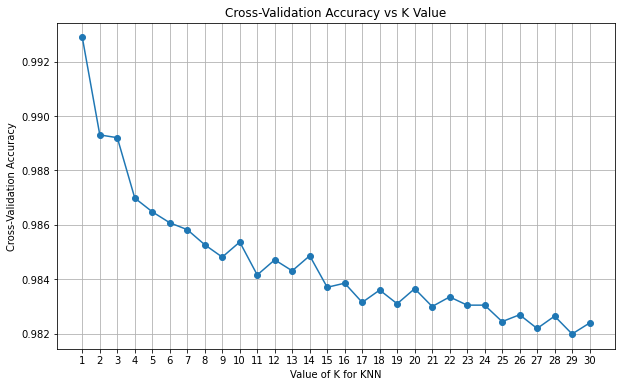

In [22]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs K Value')
plt.xticks(np.arange(1, 31, step=1))
plt.grid(True)
plt.show()

In [17]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Assuming X and y are your features and target variable
mi = mutual_info_classif(X, y)

# Create a DataFrame to see the feature ranking
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)

            Feature  MI Score
4         Perimeter  1.231112
9        ConvexArea  1.219945
3              Area  1.217882
11    EquivDiameter  1.217166
5   MajorAxisLength  1.172411
6   MinorAxisLength  1.130377
16     ShapeFactor1  1.130237
17     ShapeFactor2  1.071282
18     ShapeFactor3  0.847617
15      Compactness  0.842976
8      Eccentricity  0.833015
7      AspectRation  0.832543
14        roundness  0.827599
0      Colour_brown  0.680692
20     ShapeFactor5  0.423065
2      Colour_white  0.412181
1      Colour_green  0.411252
13         Solidity  0.260644
12           Extent  0.221515
19     ShapeFactor4  0.024468
21     ShapeFactor6  0.013496
22       Sort order  0.004540
10     Constantness  0.000000


In [35]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Define the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Perform forward selection
sfs = SequentialFeatureSelector(knn, n_features_to_select=12, direction='backward', cv=5)
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[sfs.get_support()]

print(f"Selected Features: {selected_features}")

Selected Features: Index(['Colour_brown', 'Colour_green', 'Colour_white', 'Area',
       'MinorAxisLength', 'ConvexArea', 'Solidity', 'roundness', 'Compactness',
       'ShapeFactor1', 'ShapeFactor5', 'ShapeFactor6'],
      dtype='object')


In [23]:
from sklearn.linear_model import Lasso

# Define the Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Get the coefficients
coefficients = lasso.coef_

# Create a DataFrame to see feature coefficients
coefficients_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df)

            Feature  Coefficient
16     ShapeFactor1     7.935534
14        roundness     7.412893
2      Colour_white     2.968906
1      Colour_green     2.659241
0      Colour_brown     2.361165
13         Solidity     0.986364
21     ShapeFactor6    -0.000000
19     ShapeFactor4     0.000000
18     ShapeFactor3    -0.000000
17     ShapeFactor2     0.000000
15      Compactness    -0.000000
11    EquivDiameter    -0.000000
10     Constantness    -0.000000
9        ConvexArea    -0.000000
8      Eccentricity     0.000000
7      AspectRation     0.000000
6   MinorAxisLength    -0.000000
5   MajorAxisLength     0.000000
4         Perimeter    -0.000000
3              Area    -0.000000
22       Sort order    -0.000000
12           Extent    -0.101523
20     ShapeFactor5    -0.953241


In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importance_df

,Feature,Importance
0,Colour_brown,0.104050
1,Colour_green,0.087521
2,Colour_white,0.078634
3,Area,0.048477
4,Perimeter,0.078809
5,MajorAxisLength,0.058007
6,MinorAxisLength,0.058350
7,AspectRation,0.037154
8,Eccentricity,0.038051
9,ConvexArea,0.054151


            Feature  Importance
0      Colour_brown    0.104050
1      Colour_green    0.087521
16     ShapeFactor1    0.085319
4         Perimeter    0.078809
2      Colour_white    0.078634
6   MinorAxisLength    0.058350
5   MajorAxisLength    0.058007
11    EquivDiameter    0.054334
9        ConvexArea    0.054151
3              Area    0.048477
18     ShapeFactor3    0.046534
15      Compactness    0.046221
14        roundness    0.042323
8      Eccentricity    0.038051
7      AspectRation    0.037154
17     ShapeFactor2    0.036176
20     ShapeFactor5    0.025167
13         Solidity    0.011344
12           Extent    0.003149
19     ShapeFactor4    0.002144
21     ShapeFactor6    0.002050
22       Sort order    0.001836
10     Constantness    0.000202


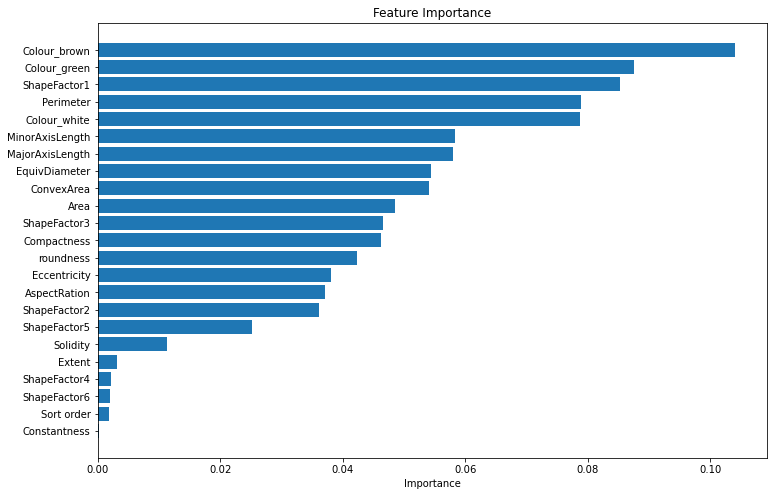

Top 10 Features:
            Feature  Importance
0      Colour_brown    0.104050
1      Colour_green    0.087521
16     ShapeFactor1    0.085319
4         Perimeter    0.078809
2      Colour_white    0.078634
6   MinorAxisLength    0.058350
5   MajorAxisLength    0.058007
11    EquivDiameter    0.054334
9        ConvexArea    0.054151
3              Area    0.048477


In [28]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print sorted features
print(importance_df)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features at the top
plt.show()

# Determine a threshold or number of top features to select
# Example: Select top 10 features
num_top_features = 10
top_features = importance_df.head(num_top_features)

print(f"Top {num_top_features} Features:")
print(top_features)

Features selected to reach 90.0% of total importance:
         Feature  Importance
7   AspectRation    0.037154
17  ShapeFactor2    0.036176
20  ShapeFactor5    0.025167
13      Solidity    0.011344
12        Extent    0.003149
19  ShapeFactor4    0.002144
21  ShapeFactor6    0.002050
22    Sort order    0.001836
10  Constantness    0.000202


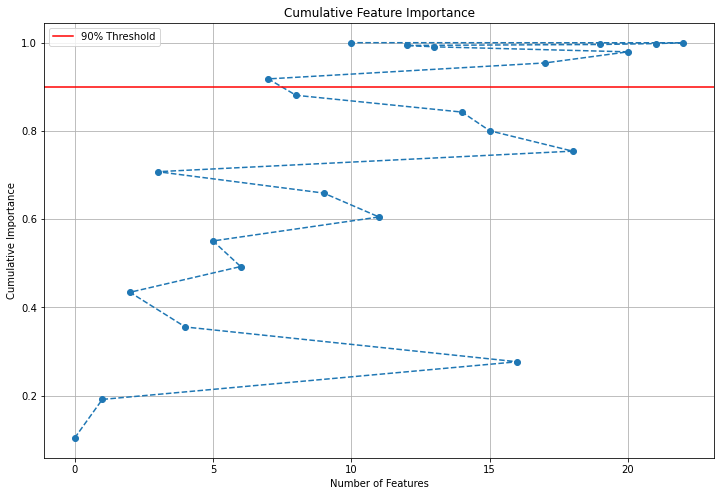

In [30]:
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Calculate cumulative importance
importance_df['Cumulative Importance'] = importance_df['Importance'].cumsum()

# Determine total importance
total_importance = importance_df['Importance'].sum()

# Set the relative threshold (e.g., 90%)
relative_threshold = 0.90
threshold_value = total_importance * relative_threshold

# Find the number of features that meet the threshold
selected_features_df = importance_df[importance_df['Cumulative Importance'] <= threshold_value]

# Add features that exactly meet or exceed the threshold
selected_features_df = importance_df[importance_df['Cumulative Importance'] >= threshold_value]

# Print selected features
print(f"Features selected to reach {relative_threshold*100}% of total importance:")
print(selected_features_df[['Feature', 'Importance']])

# Plot cumulative importance
plt.figure(figsize=(12, 8))
plt.plot(importance_df['Cumulative Importance'], marker='o', linestyle='--')
plt.axhline(y=threshold_value, color='r', linestyle='-', label='90% Threshold')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.legend()
plt.grid(True)
plt.show()

Model Accuracy: 0.9865
Number of Principal Components Used: 10
Feature Contributions to Principal Components:
Extent             2.084202
Solidity           1.926423
ShapeFactor4       1.904925
ShapeFactor5       1.818002
roundness          1.654255
ShapeFactor6       1.652054
Colour_brown       1.597285
Sort order         1.577216
Colour_white       1.517347
Constantness       1.512511
Colour_green       1.419541
Eccentricity       0.974016
AspectRation       0.888421
ShapeFactor3       0.869641
Compactness        0.848132
ShapeFactor1       0.837793
MinorAxisLength    0.758087
EquivDiameter      0.725788
Perimeter          0.717102
Area               0.696408
ConvexArea         0.694006
ShapeFactor2       0.685276
MajorAxisLength    0.684866
dtype: float64


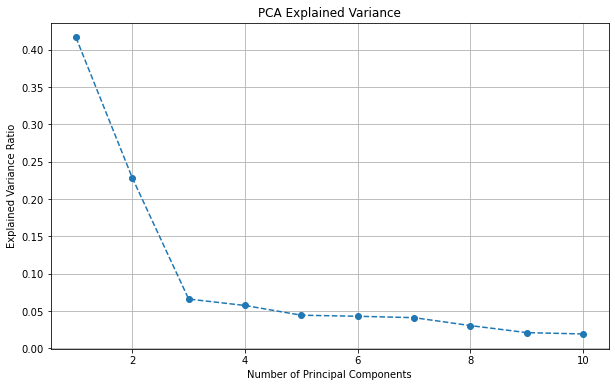

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Assuming X and y are your features and target variables
# Assuming feature_names is a list of your original feature names

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Choose components that explain 90% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"Number of Principal Components Used: {pca.n_components_}")

# Get feature contributions
components_df = pd.DataFrame(pca.components_, columns=X.columns)
contributions = components_df.abs().sum(axis=0).sort_values(ascending=False)

print("Feature Contributions to Principal Components:")
print(contributions)

# Optional: Visualize explained variance
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()
